Exercise 5 
The goal of this exercise is to explore the effect of the 2nd difference and 2nd derivative. Create a CubicSignal, which is defined in thinkdsp. Compute the second difference by applying diff twice. What does the result look like? Compute the second derivative by applying differentiate to the spectrum twice. Does the result look the same?
Plot the filters that correspond to the 2nd difference and the 2nd derivative and compare them. Hint: In order to get the filters on the same scale, use a wave with frame rate 1.

這項練習的目的是探討二階差分和二階導數的影響。創建一個CubicSignal，在thinkdsp中定義。通過應用兩次diff計算第二個差異。結果是什麼樣的？通過對光譜進行兩次微分來計算二階導數。結果看起來一樣嗎？
繪製對應於二階差分和二階導數的濾波器，並進行比較。提示：為了使濾波器達到相同的比例，請使用幀頻為1的wave。

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from thinkdsp import decorate

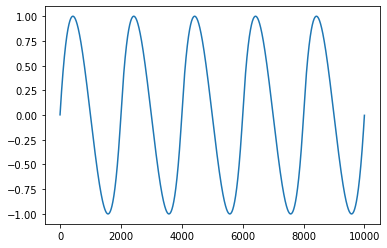

In [2]:
# cubic signal
from thinkdsp import CubicSignal

in_wave = CubicSignal(freq=0.0005).make_wave(duration=10000, framerate=1)
in_wave.plot()

第一個差異是拋物線，第二個差異是鋸齒波（到目前為止沒有驚喜）：

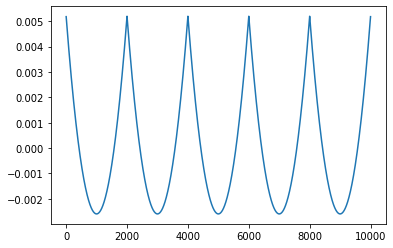

In [3]:
# diff 1
out_wave = in_wave.diff()
out_wave.plot()

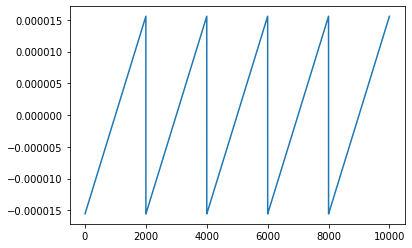

In [4]:
# diff 2
out_wave = out_wave.diff()
out_wave.plot()

當我們區分兩次時，我們會看到帶有一些振鈴的鋸齒。同樣，問題在於拋物線信號的導數在這些點上是不確定的。

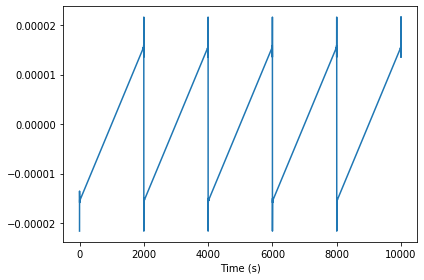

In [5]:
spectrum = in_wave.make_spectrum().differentiate().differentiate()
out_wave2 = spectrum.make_wave()
out_wave2.plot()
decorate(xlabel='Time (s)')

窗口的second difference是-1，2，-1。通過計算window的DFT，我們可以找到相應的過濾器。

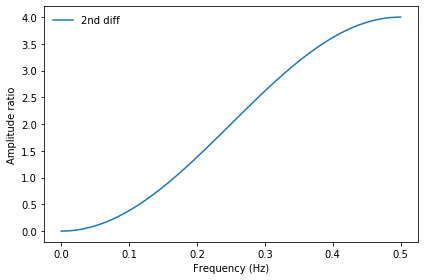

In [10]:
from thinkdsp import zero_pad
from thinkdsp import Wave

diff_window = np.array([-1.0, 2.0, -1.0])
padded = zero_pad(diff_window, len(in_wave))
diff_wave = Wave(padded, framerate=in_wave.framerate)
diff_filter = diff_wave.make_spectrum()
diff_filter.plot(label='2nd diff')

decorate(xlabel='Frequency (Hz)',
                 ylabel='Amplitude ratio')

對於二階導數，我們可以通過計算一階導數的濾波器並將其平方來找到相應的濾波器。

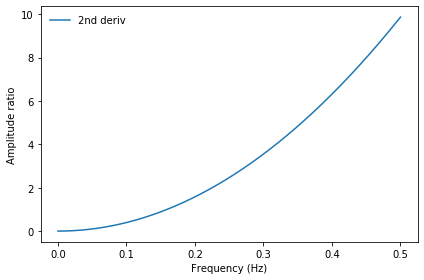

In [7]:
PI2 = np.pi * 2

deriv_filter = in_wave.make_spectrum()
deriv_filter.hs = (PI2 * 1j * deriv_filter.fs)**2
deriv_filter.plot(label='2nd deriv')

decorate(xlabel='Frequency (Hz)',
                 ylabel='Amplitude ratio')

這是兩個過濾器在相同比例下的外觀：

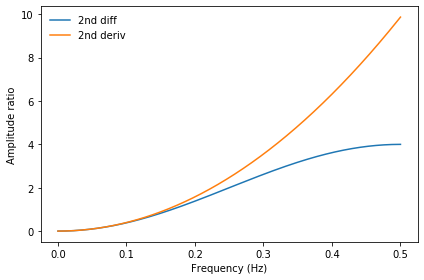

In [8]:
diff_filter.plot(label='2nd diff')
deriv_filter.plot(label='2nd deriv')

decorate(xlabel='Frequency (Hz)',
                 ylabel='Amplitude ratio')

兩者都是高通濾波器，可放大最高頻率分量。二階導數是拋物線形的，因此它會最大程度地放大最高頻率。二階差僅在最低頻率下才是二階導數的良好近似值，然後會出現明顯偏差。